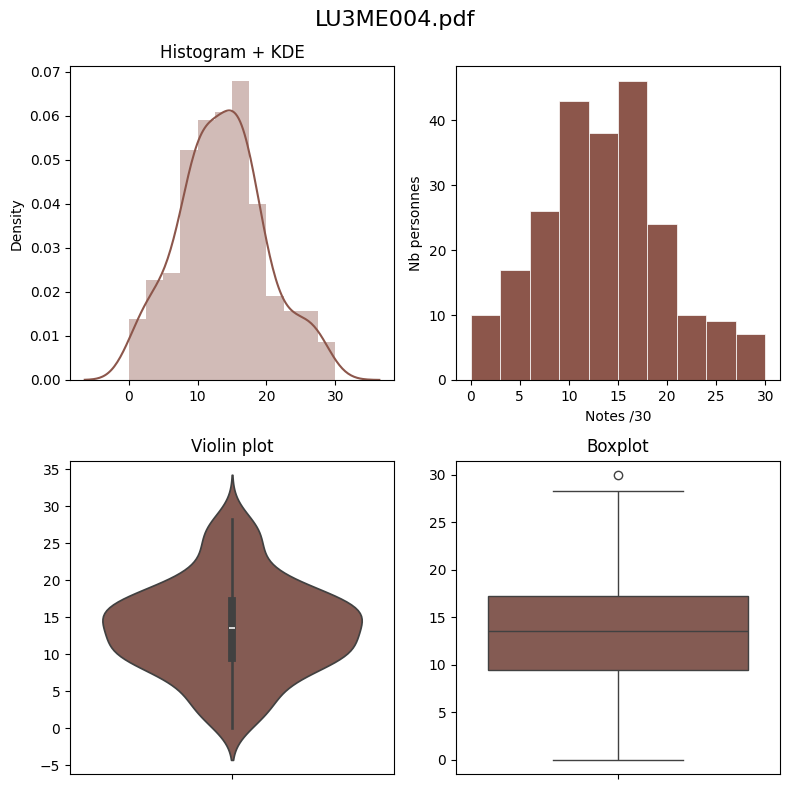

230 personnes
Median =  13.61 sur 30 
moyenne = 13.587782608695653 
ecart type = 6.329806841317766 
variance = 40.24141733244731


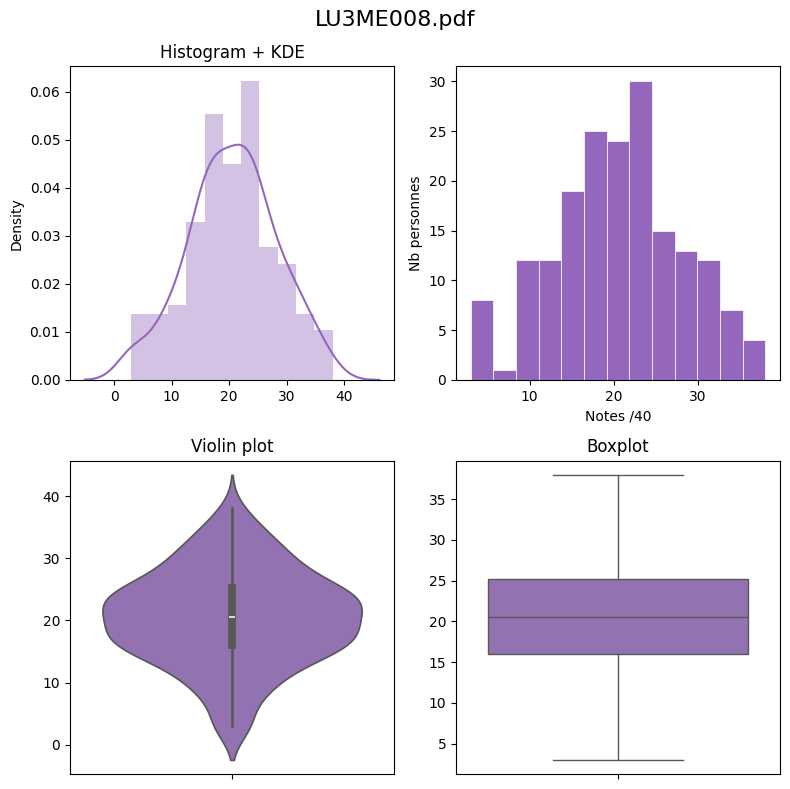

182 personnes
Median =  20.5 sur 40 
moyenne = 20.550824175824175 
ecart type = 7.6385885499233375 
variance = 58.67039986946755


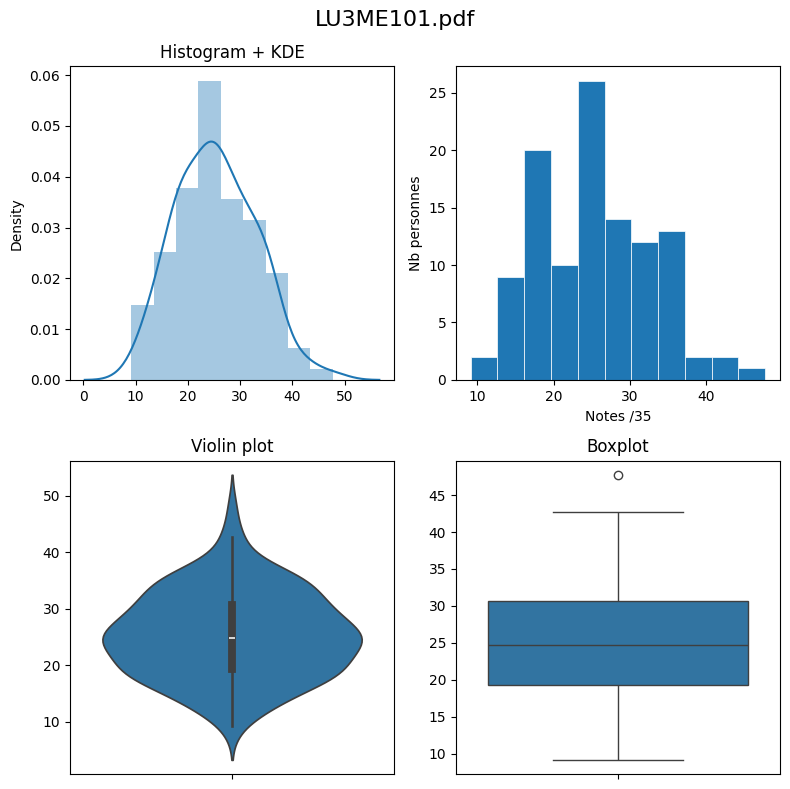

111 personnes
Median =  24.73 sur 35 
moyenne = 25.361576576576574 
ecart type = 7.569557003889131 
variance = 57.8190859009009


In [6]:
# importing all the required modules
import PyPDF2
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 
from scipy.optimize import curve_fit 
import pandas as pd
import seaborn as sns
import statistics 
import warnings
warnings.filterwarnings('ignore')

import scipy.stats as st
def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

def ReadData(filename):
    reader = PyPDF2.PdfReader(filename)

    # print the number of pages in pdf file
    # print(len(reader.pages))

    # print the text of the first page
    # print(reader.pages[0].extract_text())
    L = []
    for i in range(len(reader.pages)):
        L += reader.pages[i].extract_text().split("\n")
    if filename == "LU3ME101.pdf":
        return [float(l.split()[1].replace(',','.')) + float(l.split()[2].replace(',','.')) for l in L if 3 <= len(l) and "/" not in l and "Absent" not in l and "ABS" not in l and "TP" not in l and "A" not in l and "ER" not in l and len(l.split()) == 3 and "m" not in l and "d" not in l] 
    return [float(l.split()[1].replace(',','.')) for l in L if 3 <= len(l) and "/" not in l and "Absent" not in l and "ABS" not in l and "TP" not in l and "A" not in l and "ER" not in l] 

matieres = ["LU3ME004.pdf", "LU3ME008.pdf", "LU3ME101.pdf"]
colors   = ["tab:brown", "tab:purple", "tab:blue"]
sur      = [30, 40, 35]
mmc = ReadData("LU3ME004.pdf")
math= ReadData("LU3ME008.pdf")
fluide = ReadData("LU3ME101.pdf")

def FindMedian(donnees):
    donnees.sort()
    return donnees[int(len(donnees)/2)]

def PlotHist(donnees, matiere, note_sur):
    fig, ax = plt.subplots()
    plt.title(matiere)
    ax.plot(donnees, stats.norm.pdf(donnees, 0, note_sur))
    plt.show()
    
def plot_comparison(x, title, note_sur, col):
    fig, ax = plt.subplots(2, 2, figsize = (8,8))
    sns.distplot(x, ax=ax[0][0], color = col)
    ax[0][0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1][1], color = col)
    ax[1][1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[1][0], color=col)
    ax[1][0].set_title('Violin plot')
    ax[0][1].hist(x, bins=int(note_sur/3), linewidth=0.5, edgecolor="white", color = col)
    ax[0][1].set_xlabel("Notes /"+str(note_sur))
    ax[0][1].set_ylabel("Nb personnes")
    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()
    
for i,m in enumerate(matieres):
    data = ReadData(m)
    # PlotHist(data, m, sur[i])
    plot_comparison(data, m, sur[i], colors[i])
    print(len(data),"personnes")
    print("Median = ", FindMedian(data), "sur", sur[i], "\nmoyenne =", sum(data)/len(data), "\necart type =", np.std(np.array(data)), "\nvariance =", statistics.variance(data))